<a href="https://colab.research.google.com/github/Shaghayegh-Aflatounian/Churn-prediction-machine-learning/blob/main/Churn%20prediction-machine%20learning%20algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn


from sklearn.preprocessing import LabelEncoder
from pandas import Series, DataFrame

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
print(dataset.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset = pd.get_dummies(data=dataset, drop_first=True)

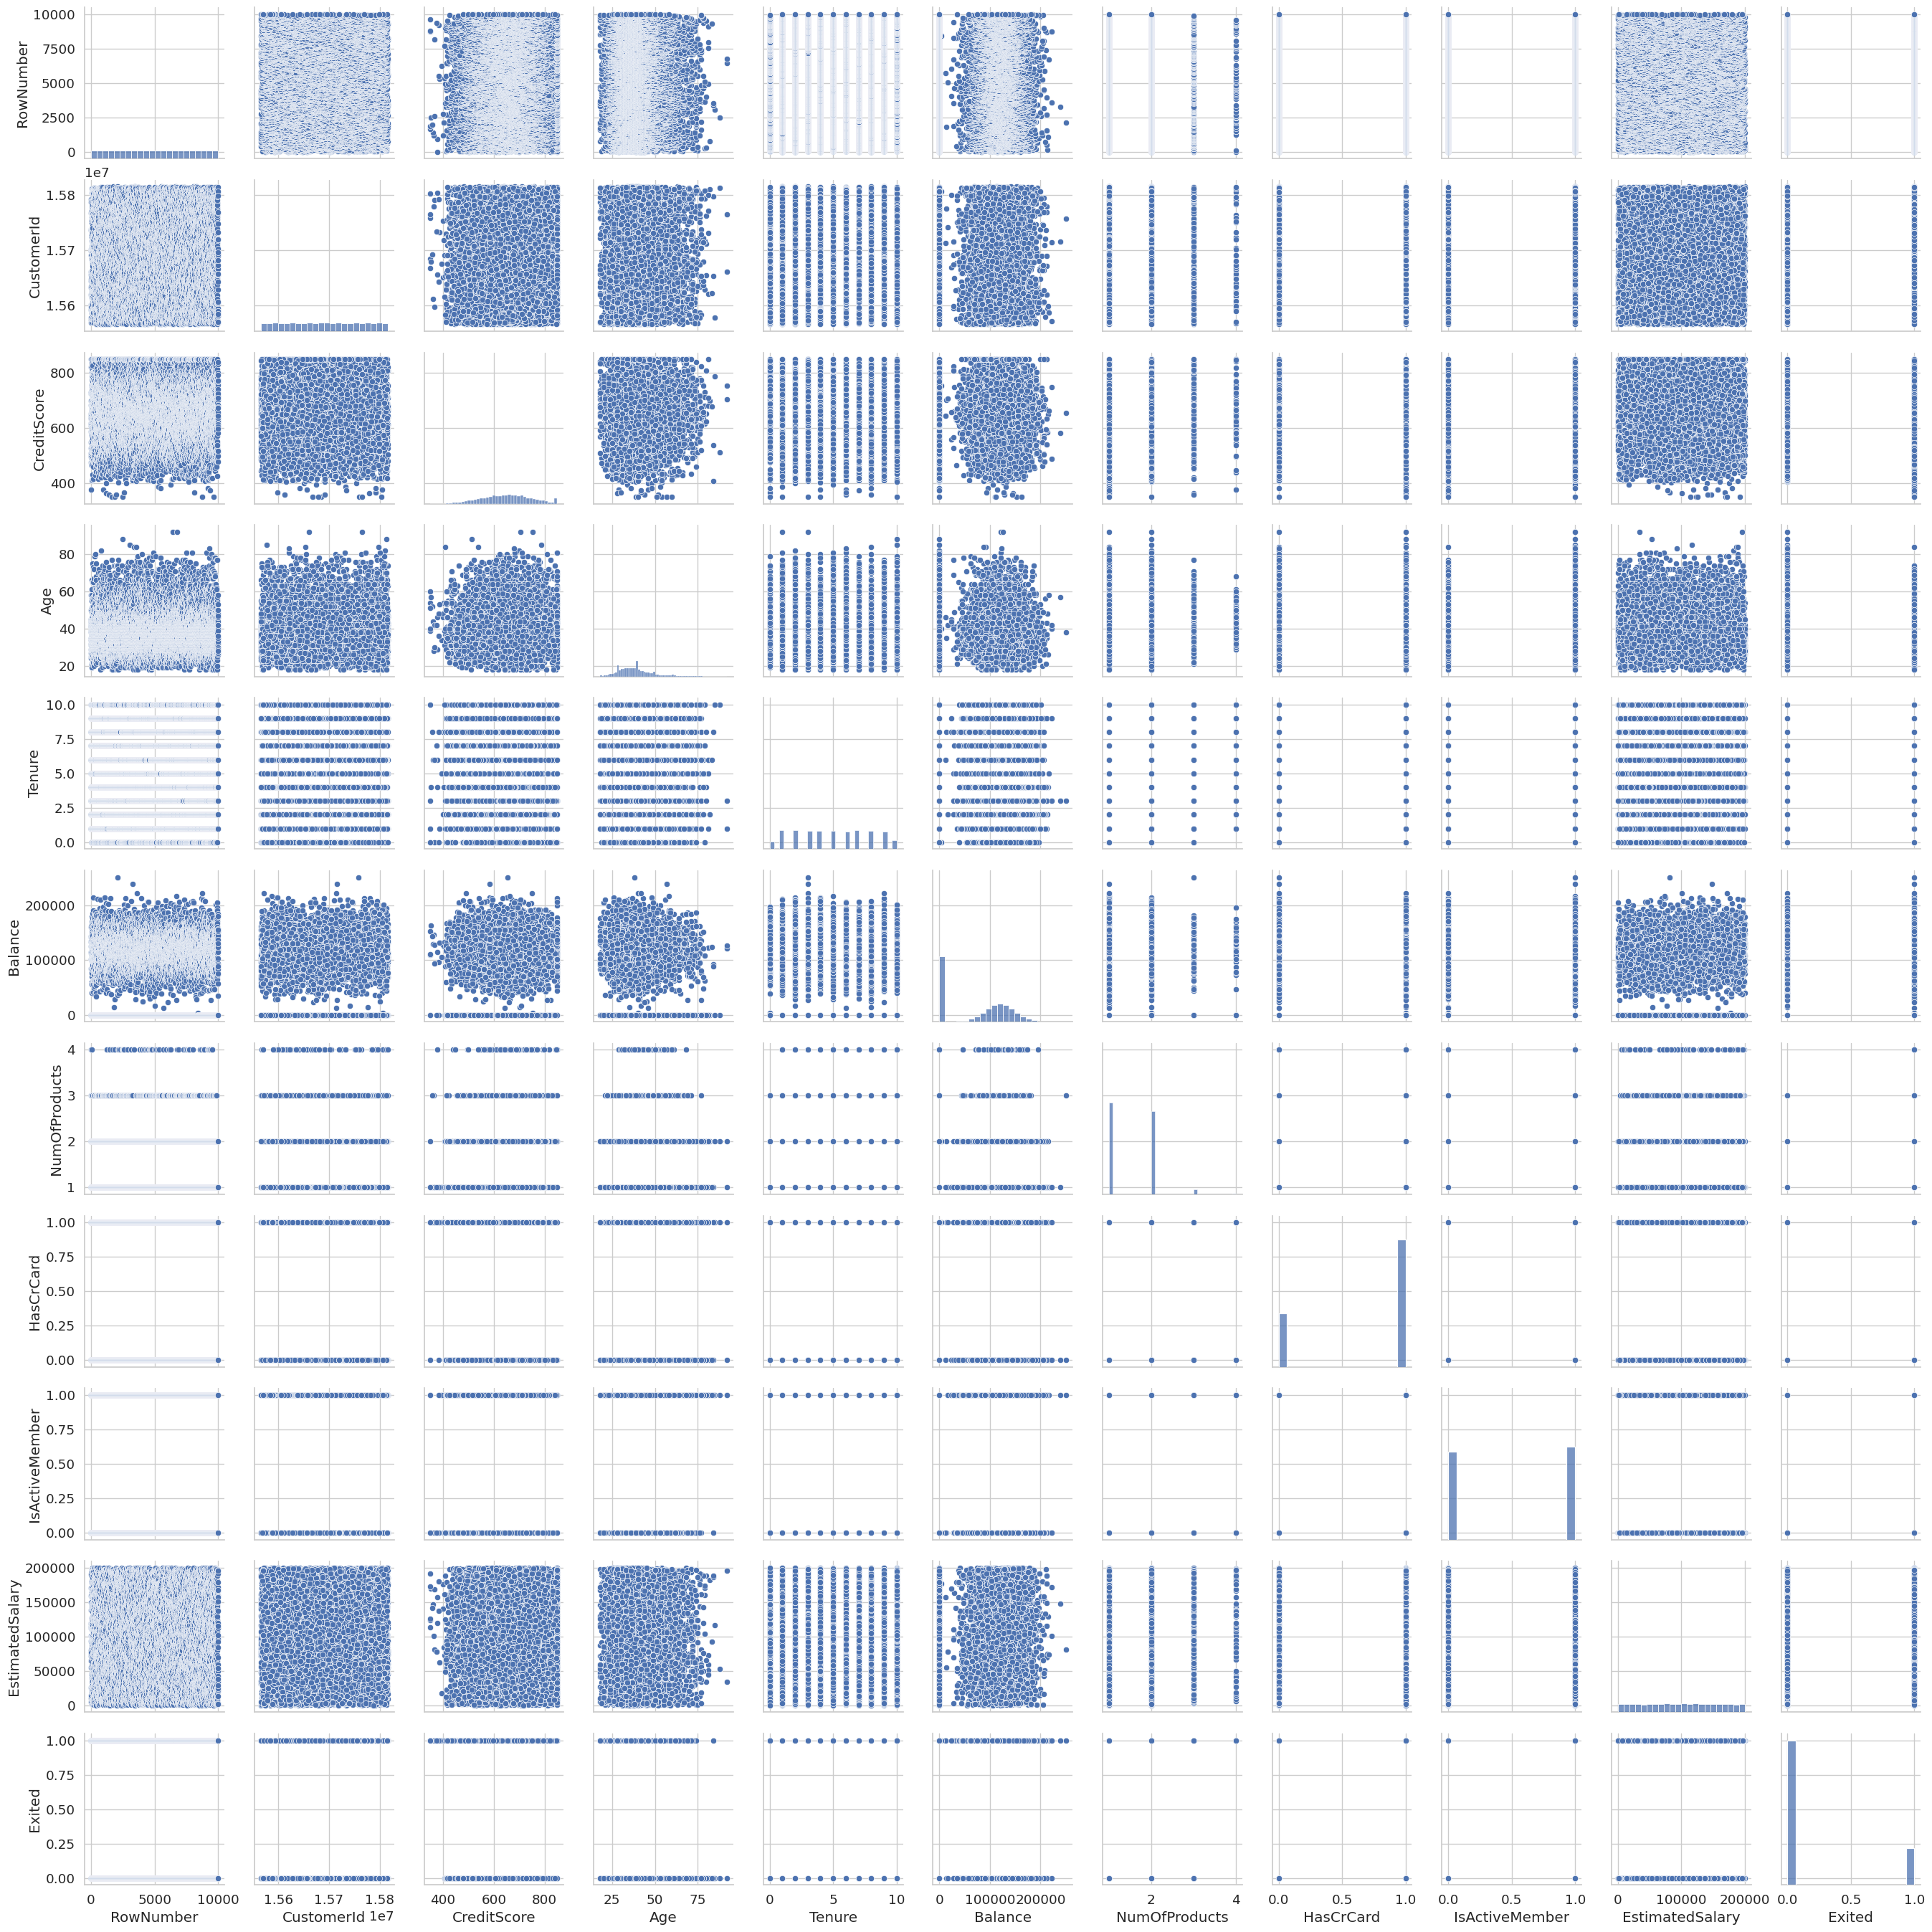

In [ ]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter
sb.pairplot(dataset)

In [ ]:
print(dataset.corr())

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                  -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance               0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts         0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard            -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember        0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary      -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited               -0.027094  0.285323 -0.014001  0.118533      -0.047820   
Geography_Germany     0.005538  0.046897 -0.000567  0.401110      -0.010419   
Geography_Spain       0.004780 -0.001685  0.003868 -0.134892       0.009039   
Gender_Male          -0.002857 -0.027544  0.014733  

In [ ]:


from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
%matplotlib inline
dataset = pd.get_dummies(data=dataset, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Standardize the testing data

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1607
           1       0.40      0.22      0.28       393

    accuracy                           0.78      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.74      0.78      0.76      2000



In [ ]:
y_train_pred = cross_val_predict(LogisticRegression(), x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[6125,  231],
       [1286,  358]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
# Building a confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1543   64]
 [ 314   79]]


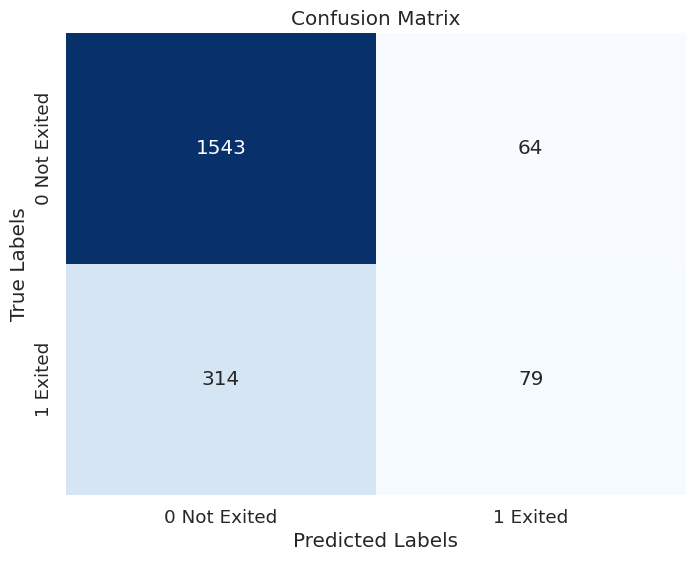

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 Not Exited', '1 Exited'],
            yticklabels=['0 Not Exited', '1 Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Random Forest


In [ ]:
x = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Standardize the testing data

ValueError: could not convert string to float: "P'an"

In [ ]:

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=200, random_state=42)

y_train_array = np.ravel(y_train)

classifier.fit(x_train, y_train_array)

y_pred = classifier.predict(x_test)


print(classification_report(y_test, y_pred))

TypeError: 'str' object is not callable

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

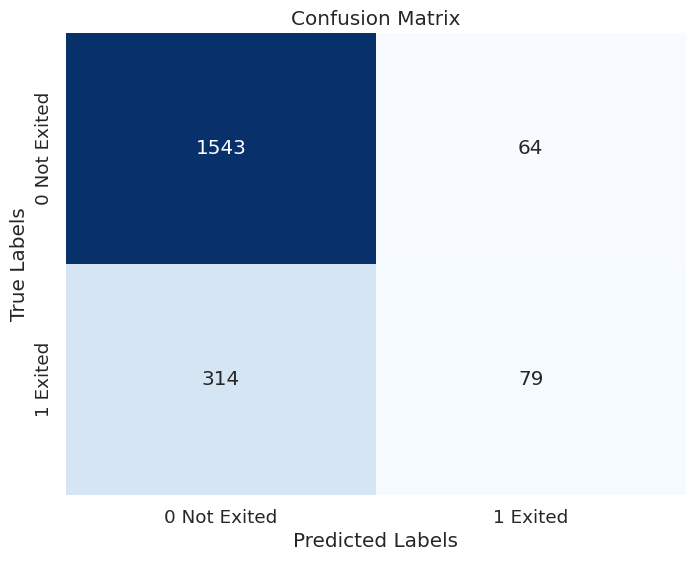

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 Not Exited', '1 Exited'],
            yticklabels=['0 Not Exited', '1 Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

CATBOOST MODELING



In [ ]:
x = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Standardize the testing data

In [ ]:
# Building a confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   60]
 [ 234  180]]


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
model.fit(X_train, y_train) # fit the model to training data


y_pred = model.predict(X_test) # Predict on the testing data

accuracy = accuracy_score(y_test, y_pred) #model performance
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


0:	learn: 0.6437623	total: 52.4ms	remaining: 5.19s
1:	learn: 0.6043569	total: 55.2ms	remaining: 2.7s
2:	learn: 0.5711301	total: 57.5ms	remaining: 1.86s
3:	learn: 0.5417856	total: 61ms	remaining: 1.46s
4:	learn: 0.5174941	total: 63.3ms	remaining: 1.2s
5:	learn: 0.4960379	total: 65.6ms	remaining: 1.03s
6:	learn: 0.4773578	total: 67.9ms	remaining: 902ms
7:	learn: 0.4612299	total: 71.6ms	remaining: 824ms
8:	learn: 0.4457814	total: 73.9ms	remaining: 748ms
9:	learn: 0.4324099	total: 76.2ms	remaining: 686ms
10:	learn: 0.4216310	total: 78.7ms	remaining: 637ms
11:	learn: 0.4121593	total: 81.9ms	remaining: 601ms
12:	learn: 0.4044421	total: 84.2ms	remaining: 563ms
13:	learn: 0.3975510	total: 86.5ms	remaining: 531ms
14:	learn: 0.3900505	total: 89.4ms	remaining: 507ms
15:	learn: 0.3841473	total: 92.4ms	remaining: 485ms
16:	learn: 0.3783421	total: 94.7ms	remaining: 462ms
17:	learn: 0.3747248	total: 97.1ms	remaining: 442ms
18:	learn: 0.3709336	total: 99.8ms	remaining: 425ms
19:	learn: 0.3666416	total

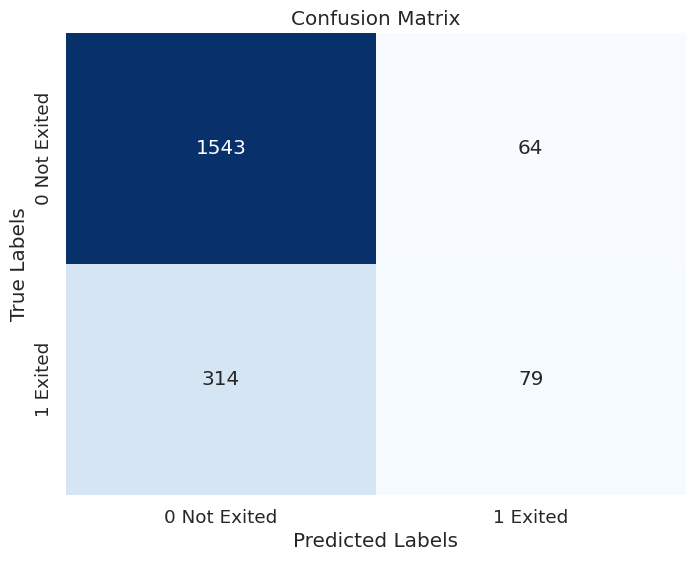

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 Not Exited', '1 Exited'],
            yticklabels=['0 Not Exited', '1 Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()